In [1]:
import numpy as np
import pandas as pd

In [2]:
ds = pd.read_csv('iris.data')

In [3]:
ds.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [4]:
from sklearn.preprocessing import LabelEncoder

In [5]:
encoder = LabelEncoder()

In [7]:
ds['Iris-setosa'] = encoder.fit_transform(ds['Iris-setosa'])

In [9]:
ds.sample(10)

,5.1,3.5,1.4,0.2,Iris-setosa
124,7.2,3.2,6.0,1.8,2
120,5.6,2.8,4.9,2.0,2
44,4.8,3.0,1.4,0.3,0
13,5.8,4.0,1.2,0.2,0
55,6.3,3.3,4.7,1.6,1
69,5.9,3.2,4.8,1.8,1
122,6.3,2.7,4.9,1.8,2
82,6.0,2.7,5.1,1.6,1
128,7.2,3.0,5.8,1.6,2
121,7.7,2.8,6.7,2.0,2


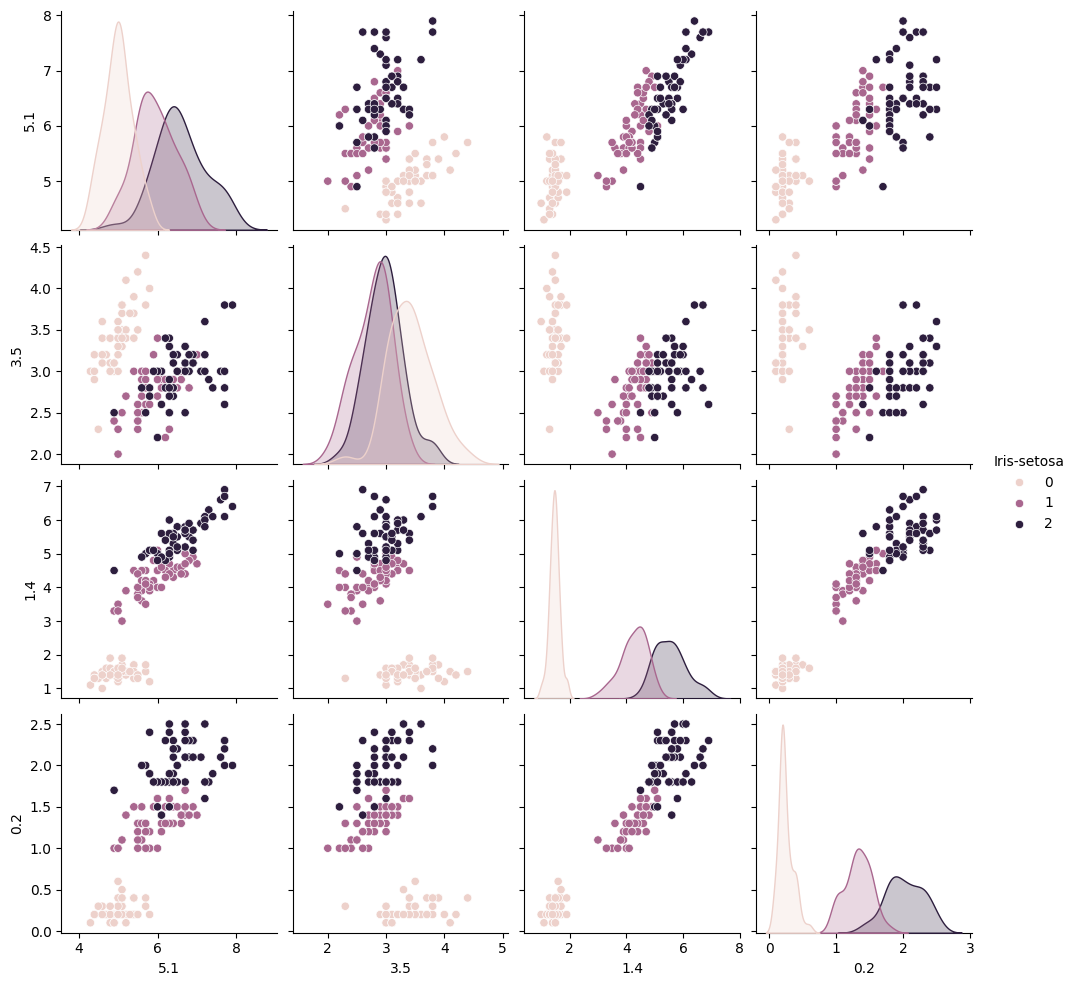

In [11]:
import seaborn as sns
sns.pairplot(ds,hue='Iris-setosa')

In [12]:
new_ds = ds[ds['Iris-setosa'] != 0][['5.1','3.5','Iris-setosa']]

In [13]:
new_ds.head()

,5.1,3.5,Iris-setosa
49,7.0,3.2,1
50,6.4,3.2,1
51,6.9,3.1,1
52,5.5,2.3,1
53,6.5,2.8,1


In [15]:
new_ds.shape

(100, 3)

In [16]:
X = ds.iloc[:,0:2]
y = ds.iloc[:,-1]

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [19]:
clf1 = LogisticRegression()
clf2 = RandomForestClassifier()
clf3 = KNeighborsClassifier()

In [20]:
estimators = [('lor',clf1),('rfc',clf2),('knc',clf3)]

In [21]:
for estimator in estimators:
    x = cross_val_score(estimator[1],X,y,cv=10,scoring='accuracy')
    print(estimator[0],np.round(np.mean(x),2))

lor 0.81
rfc 0.73
knc 0.75


In [22]:
from sklearn.ensemble import VotingClassifier

In [26]:
vc = VotingClassifier(estimators=estimators,voting='hard')
x = cross_val_score(vc,X,y,cv=10,scoring='accuracy')
print(np.round(np.mean(x),2))

0.77


In [27]:
vc1 = VotingClassifier(estimators=estimators,voting='soft')
x = cross_val_score(vc1,X,y,cv=10,scoring='accuracy')
print(np.round(np.mean(x),2))

0.75


In [28]:
for i in range(1,4):
    for j in range(1,4):
        for k in range(1,4):
            vc = VotingClassifier(estimators=estimators,voting='soft',weights=[i,j,k])
            x = cross_val_score(vc,X,y,cv=10,scoring='accuracy')
            print("for i={},j={},k={}".format(i,j,k),np.round(np.mean(x),2))

for i=1,j=1,k=1 0.77
for i=1,j=1,k=2 0.74
for i=1,j=1,k=3 0.74
for i=1,j=2,k=1 0.74
for i=1,j=2,k=2 0.75
for i=1,j=2,k=3 0.74
for i=1,j=3,k=1 0.75
for i=1,j=3,k=2 0.75
for i=1,j=3,k=3 0.74
for i=2,j=1,k=1 0.78
for i=2,j=1,k=2 0.76
for i=2,j=1,k=3 0.75
for i=2,j=2,k=1 0.76
for i=2,j=2,k=2 0.76
for i=2,j=2,k=3 0.75
for i=2,j=3,k=1 0.73
for i=2,j=3,k=2 0.75
for i=2,j=3,k=3 0.75
for i=3,j=1,k=1 0.79
for i=3,j=1,k=2 0.77
for i=3,j=1,k=3 0.78
for i=3,j=2,k=1 0.78
for i=3,j=2,k=2 0.76
for i=3,j=2,k=3 0.75
for i=3,j=3,k=1 0.74
for i=3,j=3,k=2 0.75
for i=3,j=3,k=3 0.74


In [29]:
from sklearn.svm import SVC

In [31]:
from sklearn.datasets import make_classification

X,y = make_classification(n_samples=1000,n_features=20,n_informative=15,n_redundant=5,random_state=2)

svm1 = SVC(probability=True, kernel='poly', degree=1)
svm2 = SVC(probability=True, kernel='poly', degree=2)
svm3 = SVC(probability=True, kernel='poly', degree=3)
svm4 = SVC(probability=True, kernel='poly', degree=4)
svm5 = SVC(probability=True, kernel='poly', degree=5)

estimators = [('svm1',svm1),('svm2',svm2),('svm3',svm3),('svm4',svm4),('svm5',svm5)]

for estimator in estimators:
    x = cross_val_score(estimator[1],X,y,cv=10,scoring='accuracy')
    print(estimator[0],np.round(np.mean(x),2))

svm1 0.85
svm2 0.85
svm3 0.89
svm4 0.81
svm5 0.86


In [32]:
vc1 = VotingClassifier(estimators=estimators,voting='soft')
x = cross_val_score(vc1,X,y,cv=10,scoring='accuracy')
print(np.round(np.mean(x),2))

0.93
